In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import utility

reload(utility)
from utility import *

from scipy.optimize import curve_fit
from SecondaryValue import SecondaryValue

In [2]:
org_compliance = 0.0098

In [3]:
a_an = 26  # cm^2
a_org = 6.4e-2  # cm^2
a_fol = 25  # cm^2
i_ein = 100e-3  # watt/cm^2

In [4]:
# anorganic
an_dark = parse_ccurve('../messungen/191114_OM_VB/1_d_an.dat', compliance=.99)
an_light = -1*parse_ccurve('../messungen/191114_OM_VB/1_h_an.dat')[::-1]
fol_dark = parse_ccurve('../messungen/191114_OM_VB/1_d_fol.dat',
                         compliance=org_compliance)
fol_light = parse_ccurve('../messungen/191114_OM_VB/1_h_fol.dat',
                         compliance=org_compliance)
org_dark = parse_ccurve('../messungen/191114_OM_VB/1_d_org.dat',
                        compliance=org_compliance)
org_light = parse_ccurve('../messungen/191114_OM_VB/1_h_or.dat',
                         compliance=org_compliance)

all_light = {
    'an_light': (an_light, a_an),
    'fol_light': (fol_light, a_fol),
    'org_light': (org_light, a_org)
}

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66bdd55430>)

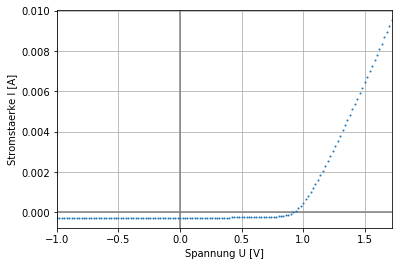

In [5]:
plot_ccurve(org_light)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66bdc8f550>)

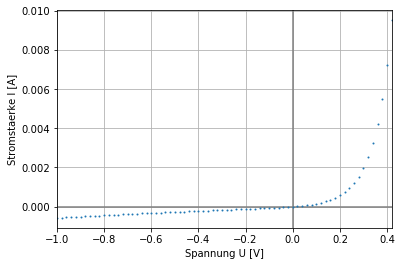

In [6]:
plot_ccurve(an_dark, save='A/an_dark_close.pdf', compliance=.01)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66bdb68520>)

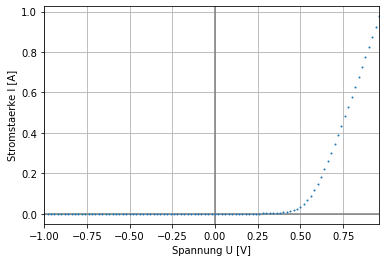

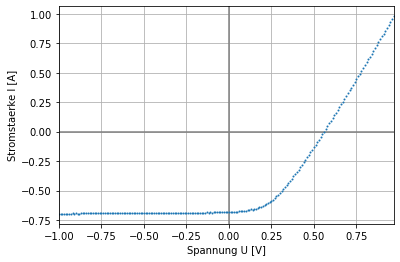

In [7]:
plot_ccurve(an_dark, save='A/an_dark_all.pdf')
plot_ccurve(an_light, save='A/an_light_all.pdf')

In [8]:
%matplotlib qt5
an_dark_lin = an_dark[90:]

d_i = 0.0001

def lin_rs(x, offset, l):
    return x*l + offset

an_param, an_sigma = curve_fit(lin_rs, an_dark_lin.T[1], an_dark_lin.T[0], sigma=np.ones_like(an_dark_lin.T[0])*d_i, absolute_sigma=True)
an_sigma = np.sqrt(np.diag(an_sigma))

plt.plot(an_dark.T[1], an_dark.T[0], linestyle='None', marker='x', label='Kennlinie')
plt.ylabel('Spannung [V]')
plt.xlabel('Stromstaerke [A]')
plt.grid()
plt.plot(an_dark_lin[:,1], lin_rs(an_dark_lin[:,1], *an_param), label='Linearer Fit')
plt.legend()

plt.savefig('./figs/A/dark_an_lin_fit.pdf', dpi=300)
R = an_param[0]
R

0.569698438377934

In [38]:
an_sigma[0]

0.00020306167618990354

In [9]:
plt.clf()
plt.ylabel('Spannung [V]')
plt.xlabel('Logarthmus der Stromstaerke')
plt.grid()
an_u, an_i = an_dark[an_dark[:,1] > 0].T
RR=R-0.222
log_i = np.log(an_i)
plt.plot(log_i, an_u - an_i * RR, linestyle='None', marker='x', label='Kennlinie')

p, _ = curve_fit(lin_rs, log_i[30:], (an_u - an_i * RR)[30:])
plt.plot(log_i, lin_rs(log_i,*p), label='Fit')
plt.legend()
n = p[1]
i_s = np.exp(-p[0]/p[1])
plt.savefig('./figs/A/dark_an_lin_fit_end.pdf', dpi=300)

In [10]:
RR

0.347698438377934

In [11]:

def u(x, i, n, RR):
    return n*np.log((x+i)/i) + x*RR
plt.clf()
plt.ylabel('Spannung [V]')
plt.xlabel('Logarthmus der Stromstaerke')
plt.grid()
plt.plot(an_i[10:], an_u[10:], linestyle='None', marker='x', label='Kennlinie')
plt.plot(an_i, u(an_i, i_s, n, RR), label='Fit')
plt.legend()
plt.savefig('./figs/A/dark_an_fit_final.pdf', dpi=300)
p, _ = curve_fit(u, an_i, an_u, p0=[i_s, n, RR])


In [12]:
# Final Parameters
nn = 11804.5221 * n / (273.15 + 32)
nn, i_s, RR

(1.4857909265575078, 9.565464918120711e-08, 0.347698438377934)

In [16]:
fig, ax = plot_ccurve(an_dark, label='Dunkel')
plot_ccurve_line(ax, an_light, label='Hell', marker='x')
ax.legend()
fig.show()
save_fig(fig, 'A/anorg_hell_dunkel.pdf')

In [54]:
plot_ccurve(fol_dark, save='A/fol_dunkel.pdf', area=a_fol)
plot_ccurve(fol_light, save='A/fol_hell.pdf', area=a_fol)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4234071c50>)

In [22]:
plot_ccurve(an_dark, save='A/an_dunkel.pdf', area=a_an)
plot_ccurve(an_light, save='A/an_hell.pdf', area=a_an)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4234fa8fd0>)

In [27]:
plot_ccurve(org_dark, save='A/org_dunkel.pdf', area=a_org)
plot_ccurve(org_light, save='A/org_hell.pdf', area=a_org)

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4234ee40b8>)

In [58]:
for name, (ccurve, area) in all_light.items():
    print(name, analyze_ccurve(ccurve, area, i_ein))

an_light (0.02630074615384615, 0.5599925566487172, 0.30999911523151735, 0.156638522040846, 0.40904859440059965, 0.06024558540032538)
fol_light (3.2946186e-05, 7.129314361652983, 4.02000070175182, 0.002029756267025768, 0.3456614690624081, 0.0008119025068103072)
org_light (0.0040643187499999995, 0.9183601229960922, 0.7400008818112345, 0.00016271274581558095, 0.6811469583998824, 0.025423866533684523)
